In [25]:
#observation 1 After looking at the data, all the news outlets that were examined had negative, neutral and positive sentiment
#outcomes.


In [ ]:
#observation 2 All the news outlets, except for the BBC, had an overall negative sentiment score, according to the bar chart
#produced.


In [ ]:
#observation 3 Based on the data, CNN had the highest overall negative sentiment between all the news outlets.

In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tweepy
import time
from datetime import datetime

In [4]:

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
# Twitter API Keys
consumer_key ='qN0U90cXCQTIV57XZRYOD0Znr'
consumer_secret ='UiyILUuUOzkNnTTyvubQePtahZiFQ8XzTTGWH34ekrKQEigbdQ'
access_token = '1009210970554576896-tONBAz2Dw4lqGaLj3QbDB5wZVOR0yR'
access_token_secret ='nRqUtNUSbltiz9Kkkz35R9mg0l186jRLOHsHlsekxsvgO'

In [12]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [13]:
# List of news organizations 
target_users = ["@BBC", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

In [14]:
# sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# DataFrame
media_sources = []
text = []
date = []
tweets_ago = []

In [15]:
#loop
for user in target_users:
    
    # Tweet count
    tweet_count = 0

    # last 100 tweets
    for x in range(5):
        # Get tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all the tweets
        for tweet in public_tweets:
        
            # Incrementing tweet_count
            tweet_count += 1
    
            # Add list
            media_sources.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)
    
            # Vader Analysis
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Adding to list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)

In [26]:
# DataFrame
TweetData = pd.DataFrame({"Media Source": media_sources, "Tweet": text, "Date & Time (UTC)": date,
    "Compound Score": compound_list, "Positive Score": positive_list,
    "Neutral Score": neutral_list, "Negative Score": negative_list,
    "Tweets Ago": tweets_ago})

TweetData = TweetData[["Media Source", "Tweet", "Date & Time (UTC)", "Compound Score",
                         "Positive Score", "Negative Score",
                         "Neutral Score", "Tweets Ago"]]


TweetData.head(10)

,Media Source,Tweet,Date & Time (UTC),Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,@BBC,RT @5liveSport: FT:\n\n#URU 2 - 1 #POR\n\nPort...,Sat Jun 30 19:56:38 +0000 2018,0.5707,0.150,0.000,0.850,1
1,@BBC,RT @bbcthree: Would you criticise a stranger l...,Sat Jun 30 19:50:50 +0000 2018,-0.5106,0.153,0.356,0.491,2
2,@BBC,With plastic protests around the country and a...,Sat Jun 30 19:27:05 +0000 2018,-0.6705,0.000,0.234,0.766,3
3,@BBC,RT @BBCWorld: Unesco announces new heritage si...,Sat Jun 30 18:28:48 +0000 2018,0.0000,0.000,0.000,1.000,4
4,@BBC,😨👀 This AI software uses wireless signals to w...,Sat Jun 30 18:12:00 +0000 2018,0.0000,0.000,0.000,1.000,5
5,@BBC,💪👕 Doing laundry on Fair Isle is not for the f...,Sat Jun 30 17:04:00 +0000 2018,0.3802,0.166,0.000,0.834,6
6,@BBC,🎧✊ DJ Switch has big plans for the future. htt...,Sat Jun 30 16:04:06 +0000 2018,0.0000,0.000,0.000,1.000,7
7,@BBC,RT @5liveSport: What a stat 🔥⚽️\n\nMbappe is t...,Sat Jun 30 16:03:09 +0000 2018,0.0000,0.000,0.000,1.000,8
8,@BBC,💄 Does your lipstick threaten the future of on...,Sat Jun 30 15:07:03 +0000 2018,-0.3818,0.000,0.157,0.843,9
9,@BBC,"RT @Wimbledon: ""It was one of the most emotion...",Sat Jun 30 13:40:13 +0000 2018,0.5509,0.165,0.000,0.835,10


In [17]:
# Grab info 
bbc = TweetData.loc[TweetData["Media Source"] == "@BBC"]
cbs = TweetData.loc[TweetData["Media Source"] == "@CBSNews"]
cnn = TweetData.loc[TweetData["Media Source"] == "@CNN"]
fox = TweetData.loc[TweetData["Media Source"] == "@FoxNews"]
nyt = TweetData.loc[TweetData["Media Source"] == "@nytimes"]

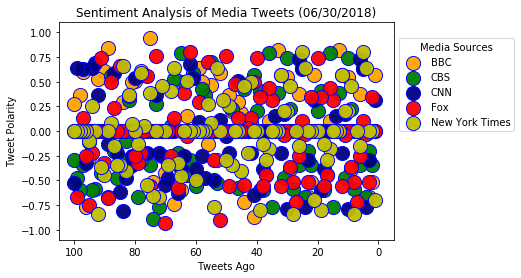

In [23]:
# scatterplot
plt.scatter(bbc['Tweets Ago'], bbc['Compound Score'], c='orange',edgecolor='b', s=200, alpha=0.95, label='BBC')
plt.scatter(cbs['Tweets Ago'], cbs['Compound Score'], c='g',edgecolor='b', s=200, alpha=0.95, label='CBS')
plt.scatter(cnn['Tweets Ago'], cnn['Compound Score'], c='navy',edgecolor='b', s=200, alpha=0.95, label='CNN')
plt.scatter(fox['Tweets Ago'], fox['Compound Score'], c='r',edgecolor='b', s=200, alpha=0.95, label='Fox')
plt.scatter(nyt['Tweets Ago'], nyt['Compound Score'], c='y',edgecolor='b', s=200, alpha=0.95, label='New York Times')

plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize='medium')

#plt.savefig("Images/Sentiment Analysis of Media Tweets.png", bbox_inches="tight")
plt.show()

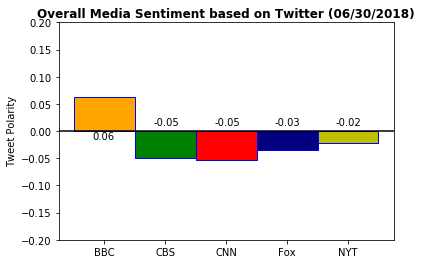

In [24]:
# Bar chart
plt.bar(0, bbc['Compound Score'].mean(), color='orange', edgecolor='b', width=1)
plt.bar(1, cbs['Compound Score'].mean(), color='g', edgecolor='b', width=1)
plt.bar(2, cnn['Compound Score'].mean(), color='r', edgecolor='b', width=1)
plt.bar(3, fox['Compound Score'].mean(), color='navy', edgecolor='b', width=1)
plt.bar(4, nyt['Compound Score'].mean(), color='y', edgecolor='b', width=1)

plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),
                                                                           fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylim(-0.2, 0.2)
plt.ylabel("Tweet Polarity")
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

for a,b in zip(np.arange(5), [bbc['Compound Score'].mean(),cbs['Compound Score'].mean(), 
                              cnn['Compound Score'].mean(),
                             fox['Compound Score'].mean(),nyt['Compound Score'].mean()]):
    if b > 0:
        plt.text(a-0.2,b-b-0.015,str(round(b,2)))
    else:
        plt.text(a-0.2,b-b+0.01,str(round(b,2)))             
        
        

plt.show()

In [27]:
# Output File (CSV)
output_data_file = "output_data/news.csv"